## Loading data and preliminary analysis

In [4]:
import re
import random
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

In [5]:
data=pd.read_csv("info.csv",nrows=20)

In [6]:
data.head()

,No,Questions,Answers
0,1,Apa itu MSIB?,Program Magang dan Studi Independen Bersertifi...
1,2,Apakah program Magang atau Studi Independen di...,Program Magang atau Studi Independen dapat dil...
2,3,Apa itu Magang?,Kegiatan dimana mahasiswa bekerja di organisas...
3,4,Apa kriteria Magang?,Berikut adalah kriteria Magang:\n1. Mahasiswa ...
4,5,Apa itu Studi Independen?,Program pembelajaran non-gelar yang diselengga...


In [7]:
# data preprocessing 

for i in range(data.shape[0]):
  data['Answers'][i]=re.sub(r'\n', ' ',data['Answers'][i])
  data['Answers'][i]=re.sub('\(', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'\)', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r',', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'-', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])  
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])

In [8]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answers'][i]))

In [9]:
pairs                                     # questions

[('Apa itu MSIB?',
  'Program Magang dan Studi Independen Bersertifikat Kampus Merdeka memberikan kesempatan kepada mahasiswa untuk mengasah dan mendapatkan kemampuan pengetahuan dan sikap di dunia industri dengan cara bekerja dan belajar secara langsung dalam proyek atau permasalahan riil. Pengalaman belajar di luar perguruan tinggi selama lebih dari 16 minggu hingga 24 minggu dengan aktivitas pembelajaran yang terstruktur akan dikonversi ke SKS Mahasiswa'),
 ('Apakah program Magang atau Studi Independen dilaksanakan secara luring?',
  'Program Magang atau Studi Independen dapat dilaksanakan secara luring daring atau hybrid. Hal tersebut menjadi pilihan masingmasing Mitra Industri.'),
 ('Apa itu Magang?',
  'Kegiatan dimana mahasiswa bekerja di organisasi mitra sebagai trainee selama periode waktu terbatas'),
 ('Apa kriteria Magang?',
  'Berikut adalah kriteria Magang: 1. Mahasiswa diberikan proyek riil yang memiliki nilai strategis bagi industri dan dikerjakan secara berkelompok lint

## Data preprocessing 

In [10]:
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Splitting words from punctuation  
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)

input_tokens = sorted(list(input_tokens))  # contains all words of input_docs
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

In [11]:
input_docs

['Apa itu MSIB?',
 'Apakah program Magang atau Studi Independen dilaksanakan secara luring?',
 'Apa itu Magang?',
 'Apa kriteria Magang?',
 'Apa itu Studi Independen?',
 'Pengumpulan Surat Rekomendasi dan Surat Pernyataan Tanggung Jawab Mutlak ',
 'Kuota lamaran',
 'Proses seleksi',
 'Lini Masa',
 'Syarat dan Ketentuan',
 'Template ',
 'Link daftar Magang',
 'Link daftar Studi Independen',
 'Link tentang MSIB',
 'Cara mendaftar program MSIB',
 'Cara membuat akun Kampus Merdeka',
 'Cara merubah password akun',
 'Status Mahasiswa & Universitas untuk Program MSIB',
 'Ketentuan Dokumen untuk Pendaftaran Mahasiswa MSIB',
 'Cara mendapatkan surat rekomendasi Fasilkom']

In [12]:
target_docs

['<START> Program Magang dan Studi Independen Bersertifikat Kampus Merdeka memberikan kesempatan kepada mahasiswa untuk mengasah dan mendapatkan kemampuan pengetahuan dan sikap di dunia industri dengan cara bekerja dan belajar secara langsung dalam proyek atau permasalahan riil . Pengalaman belajar di luar perguruan tinggi selama lebih dari 16 minggu hingga 24 minggu dengan aktivitas pembelajaran yang terstruktur akan dikonversi ke SKS Mahasiswa <END>',
 '<START> Program Magang atau Studi Independen dapat dilaksanakan secara luring daring atau hybrid . Hal tersebut menjadi pilihan masingmasing Mitra Industri . <END>',
 '<START> Kegiatan dimana mahasiswa bekerja di organisasi mitra sebagai trainee selama periode waktu terbatas <END>',
 '<START> Berikut adalah kriteria Magang : 1 . Mahasiswa diberikan proyek riil yang memiliki nilai strategis bagi industri dan dikerjakan secara berkelompok lintas disiplin ilmu 2 . Dalam menyelesaikan proyek diberikan pengetahuan melalui modul pembelajara

In [13]:
input_features_dict = dict([(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [14]:
input_features_dict

{'&': 0,
 '?': 1,
 'Apa': 2,
 'Apakah': 3,
 'Cara': 4,
 'Dokumen': 5,
 'Fasilkom': 6,
 'Independen': 7,
 'Jawab': 8,
 'Kampus': 9,
 'Ketentuan': 10,
 'Kuota': 11,
 'Lini': 12,
 'Link': 13,
 'MSIB': 14,
 'Magang': 15,
 'Mahasiswa': 16,
 'Masa': 17,
 'Merdeka': 18,
 'Mutlak': 19,
 'Pendaftaran': 20,
 'Pengumpulan': 21,
 'Pernyataan': 22,
 'Program': 23,
 'Proses': 24,
 'Rekomendasi': 25,
 'Status': 26,
 'Studi': 27,
 'Surat': 28,
 'Syarat': 29,
 'Tanggung': 30,
 'Template': 31,
 'Universitas': 32,
 'akun': 33,
 'atau': 34,
 'daftar': 35,
 'dan': 36,
 'dilaksanakan': 37,
 'itu': 38,
 'kriteria': 39,
 'lamaran': 40,
 'luring': 41,
 'membuat': 42,
 'mendaftar': 43,
 'mendapatkan': 44,
 'merubah': 45,
 'password': 46,
 'program': 47,
 'rekomendasi': 48,
 'secara': 49,
 'seleksi': 50,
 'surat': 51,
 'tentang': 52,
 'untuk': 53}

## Encoder - Decoder model

In [15]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [16]:
encoder_input_data

array([[[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
decoder_target_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Training

In [3]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model  
dimensionality = 256 # Dimensionality 
batch_size = 10   # The batch size and number of epochs
epochs = 500 

#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

NameError: name 'num_encoder_tokens' is not defined

In [ ]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs) # Compiling

In [20]:
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 54)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 251)]  0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        318464      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

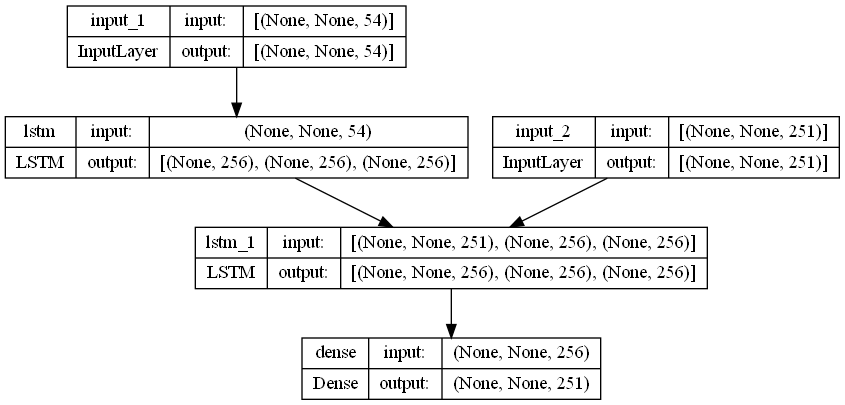

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

In [1]:
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'], sample_weight_mode='temporal')#Training
history1=training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)
training_model.save('training_model.h5')

NameError: name 'training_model' is not defined

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [ ]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [ ]:
from keras.models import load_model
training_model = load_model('training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
          
          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token
          
          #Stop if hit max length or found the stop token
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
          
          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.
          
          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

## KPAIR-Trained DEEP LSTM CLASS CONVO

In [ ]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the conversation
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. AMA!\n")
    
    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return
    self.chat(user_response)
  
  #Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
  
  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False
  
chatbot = ChatBot()

## Demo

In [ ]:
chatbot.start_chat()